<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/Bai_tap_noi_com_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 33.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=dec456b1df028681f9e7827a33288aa5c6536e6fae90df754a937cfab7cc478f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Nhập lượng gạo : 120
Nhập thời gian : 60
Công suất là:  60.0 W


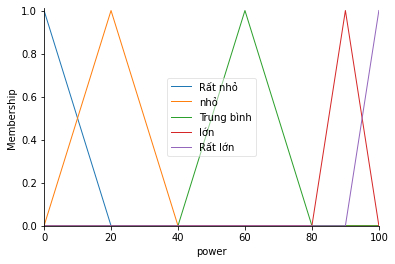

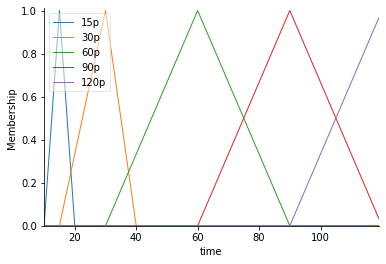

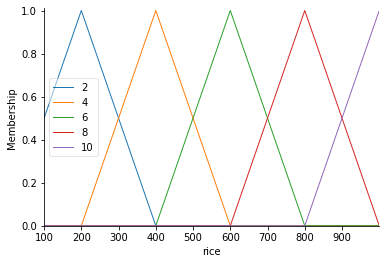

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time=ctrl.Antecedent(np.arange(10,120,1),'time')
rice = ctrl.Antecedent(np.arange(100,1000,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')

time['15p']=fuzz.trimf(time.universe,[10,15,20])
time['30p']=fuzz.trimf(time.universe,[15,30,40])
time['60p']=fuzz.trimf(time.universe,[30,60,90])
time['90p']=fuzz.trimf(time.universe,[60,90,120])
time['120p']=fuzz.trimf(time.universe,[90,120,140])

rice['2']=fuzz.trimf(rice.universe,[0,200,400])
rice['4']=fuzz.trimf(rice.universe,[200,400,600])
rice['6']=fuzz.trimf(rice.universe,[400,600,800])
rice['8']=fuzz.trimf(rice.universe,[600,800,1000])
rice['10']=fuzz.trimf(rice.universe,[800,1000,2000])

power['Rất nhỏ'] = fuzz.trimf(power.universe,[0,0,20])
power['nhỏ'] = fuzz.trimf(power.universe,[0,20,40])
power['Trung bình'] = fuzz.trimf(power.universe,[40,60,80])
power['lớn'] = fuzz.trimf(power.universe,[80,90,100])
power['Rất lớn'] = fuzz.trimf(power.universe,[90,100,100])

rule1=ctrl.Rule(time['15p']&rice['2'],power['Rất nhỏ'])
rule2=ctrl.Rule(time['15p']&rice['4'],power['nhỏ'])
rule3=ctrl.Rule(time['15p']&rice['6'],power['Trung bình'])
rule4 =ctrl.Rule(time['15p']&rice['8'], power['Trung bình'])
rule5=ctrl.Rule(time['15p']&rice['10'],power['lớn'])

rule6=ctrl.Rule(time['30p']&rice['2'],power['Trung bình'])
rule7=ctrl.Rule(time['30p']&rice['4'],power['Trung bình'])
rule8=ctrl.Rule(time['30p']&rice['6'],power['lớn'])
rule9=ctrl.Rule(time['30p']&rice['8'],power['Rất lớn'])
rule10=ctrl.Rule(time['30p']&rice['10'],power['Rất lớn'])
rule11=ctrl.Rule(time['60p']&rice['2'],power['Trung bình'])
rule12=ctrl.Rule(time['60p']&rice['4'],power['Trung bình'])
rule13=ctrl.Rule(time['60p']&rice['6'],power['lớn'])
rule14=ctrl.Rule(time['60p']&rice['8'],power['lớn'])
rule15=ctrl.Rule(time['60p']&rice['10'],power['Rất lớn'])
rule16=ctrl.Rule(time['90p']&rice['2'],power['lớn'])
rule17=ctrl.Rule(time['90p']&rice['4'],power['Trung bình'])
rule18=ctrl.Rule(time['90p']&rice['6'],power['Rất lớn'])
rule19=ctrl.Rule(time['90p']&rice['8'],power['Rất lớn'])
rule20=ctrl.Rule(time['90p']&rice['10'],power['Rất lớn'])
rule21=ctrl.Rule(time['120p']&rice['2'],power['lớn'])
rule22=ctrl.Rule(time['120p']&rice['4'],power['Rất lớn'])
rule23=ctrl.Rule(time['120p']&rice['6'],power['Rất lớn'])
rule24=ctrl.Rule(time['120p']&rice['8'],power['Rất lớn'])
rule25=ctrl.Rule(time['120p']&rice['10'],power['Rất lớn'])
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice']=float(input("Nhập lượng gạo : "))
powering.input['time']=float(input("Nhập thời gian : "))
powering.compute()
print("Công suất là: " ,round((powering.output['power']),1),"W")
power.view()
time.view()
rice.view()